<a href="https://colab.research.google.com/github/Anvith17/DIP_lab/blob/main/dipFdomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


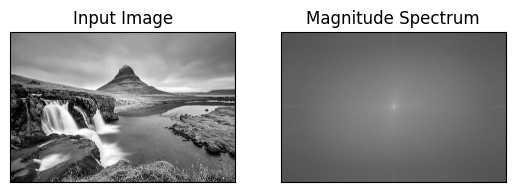

In [17]:
#Program 1: Image Fourier Transform
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-9-9bd0ea2d700a>:15: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


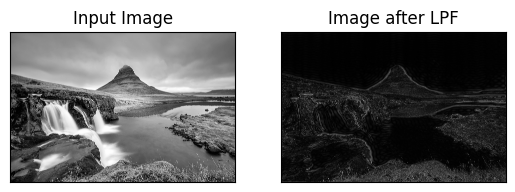

In [9]:
#Program 2: Image Low-Pass Filtering

import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
fshift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

magnitude_spectrum = 20 * np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.show()


<ipython-input-10-072cf0725671>:15: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


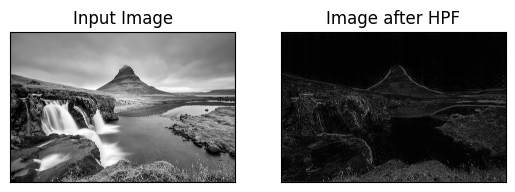

In [10]:
#Program 3: Image High-Pass Filtering
#------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
fshift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

magnitude_spectrum = 20 * np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-11-44176549bc32>:22: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


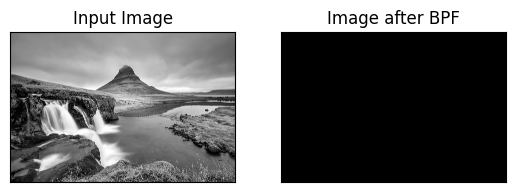

In [11]:
#Program 4: Image Band-Pass Filtering
#------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
fshift_low = np.copy(fshift)
fshift_low[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
fshift_high = np.copy(fshift)
fshift_high[:crow - 30, :] = 0
fshift_high[crow + 30:, :] = 0
fshift_high[:, :ccol - 30] = 0
fshift_high[:, ccol + 30:] = 0
fshift = fshift_low * fshift_high

magnitude_spectrum = 20 * np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Image after BPF'), plt.xticks([]), plt.yticks([])
plt.show()

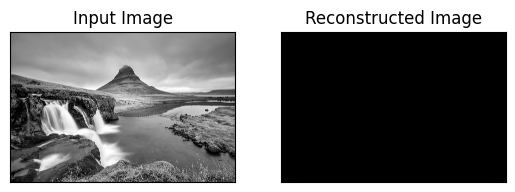

In [12]:
#Program 5: Image Reconstruction from Magnitude Spectrum
#------------------------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)

# Set the phase spectrum to zero
phase_spectrum = np.zeros_like(fshift)

# Reconstruct the image using inverse Fourier Transform
f_ishift = np.fft.ifftshift(magnitude_spectrum * np.exp(1j * phase_spectrum))
image_reconstructed = np.fft.ifft2(f_ishift)
image_reconstructed = np.abs(image_reconstructed)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()



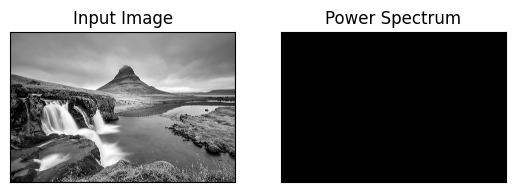

In [13]:
#Program 6: Image Power Spectrum Calculation
#------------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
power_spectrum = np.abs(fshift) ** 2

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(power_spectrum, cmap='gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


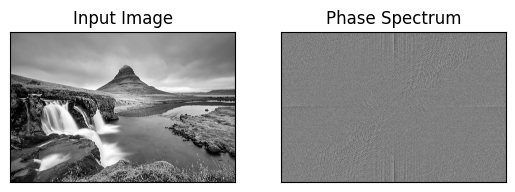

In [14]:
#Program 7: Image Phase Spectrum Calculation
#------------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
phase_spectrum = np.angle(fshift)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



<ipython-input-15-ed7d5d6e2289>:26: RuntimeWarning: invalid value encountered in sqrt
  filtered_image = filtered_image ** gamma_l * (255 ** (1 - gamma_l))


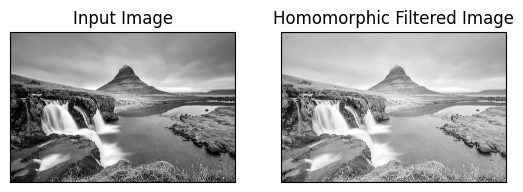

In [15]:
#Program 8: Image Homomorphic Filtering
#-------------------------------------
import numpy as np
import cv2
from matplotlib import pyplot as plt

def homomorphic_filter(image, cutoff_freq, gamma_l, gamma_h):
    image_log = np.log1p(np.array(image, dtype="float"))
    image_fft = np.fft.fft2(image_log)

    rows, cols = image_fft.shape
    crow, ccol = rows // 2, cols // 2

    # Construct the high-pass filter
    high_pass_filter = np.ones((rows, cols))
    high_pass_filter[crow - cutoff_freq:crow + cutoff_freq, ccol - cutoff_freq:ccol + cutoff_freq] = 0

    # Apply the filter in the frequency domain
    filtered_fft = image_fft * high_pass_filter

    # Perform inverse Fourier Transform
    filtered_image = np.fft.ifft2(filtered_fft)
    filtered_image = np.exp(np.real(filtered_image)) - 1

    # Apply gamma correction
    filtered_image = filtered_image ** gamma_l * (255 ** (1 - gamma_l))
    filtered_image = np.uint8(filtered_image)

    return filtered_image

image = cv2.imread('/content/drive/MyDrive/image.jpg', 0)
filtered_image = homomorphic_filter(image, cutoff_freq=30, gamma_l=0.5, gamma_h=1.5)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Homomorphic Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()